In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [3]:
# data loed
iris = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
### 입력변수(x)
x = iris.iloc[:,3:5]
y = iris.iloc[:,5]

In [5]:
### K-means
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
### cluster
cluster_pred = model.labels_

In [7]:
### 교차표
pd.crosstab(y, cluster_pred)

col_0,0,1,2
Species,,,
setosa,50,0,0
versicolor,0,2,48
virginica,0,46,4


In [8]:
import matplotlib.pyplot as plt

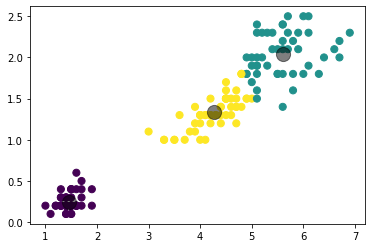

In [9]:
### scatter plot
plt.scatter(x['Petal.Length'], x['Petal.Width'], c=cluster_pred, s=50)
# centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);

## Inertia value를 이용한 적정 군집수 판단

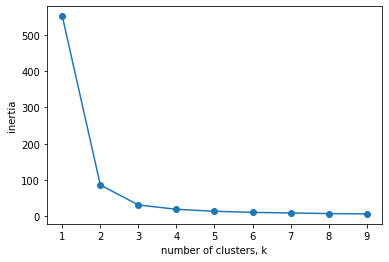

In [10]:
ks = range(1,10)
inertias = []

for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)
    
# plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## 커널화된 k-means

In [11]:
from sklearn.datasets import make_moons

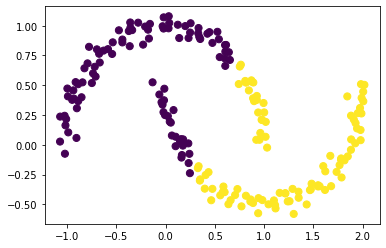

In [12]:
### Ex. data
X, y = make_moons(200,noise=.05, random_state=0)
### k-means
labels = KMeans(2, random_state=0).fit_predict(X)
### scatter plot
plt.scatter(X[:, 0],X[:, 1], c=labels, s=50);

In [13]:
from sklearn.cluster import SpectralClustering

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


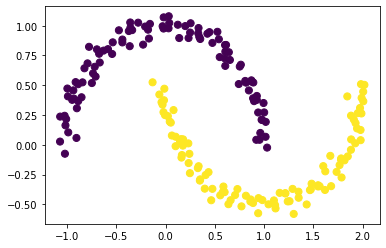

In [14]:
### Spectral Clustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
### scatter plot
plt.scatter(X[:, 0],X[:, 1], c=labels, s=50);

06.17.수

## 병합 군집(Agglomerative clustering)

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
import pandas as pd

In [17]:
### data load
iris = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")

In [18]:
### 입력변수(x)
x = iris.iloc[:,3:5]
y = iris.iloc[:, 5]

In [19]:
import matplotlib.pyplot as plt

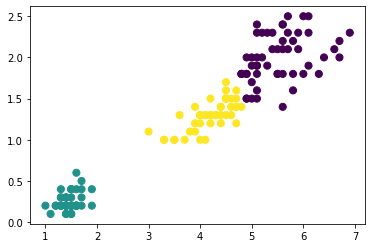

In [20]:
### 병합 군집
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(x)
plt.scatter(x["Petal.Length"], x["Petal.Width"], c=assignment, s=50)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
### 표준화
x_std = StandardScaler().fit_transform(x)

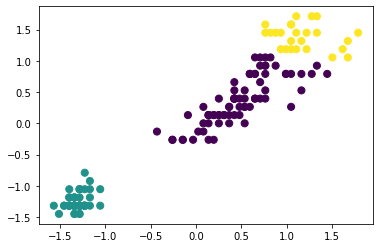

In [23]:
### 병합 군집
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(x_std)
plt.scatter(x_std[:,0], x_std[:,1], c=assignment, s=50)

## 계층적 군집과 덴드로그램

In [24]:
from scipy.cluster.hierarchy import dendrogram, ward

In [25]:
# 거리 정보가 담긴 배열
linkage_array = ward(x)

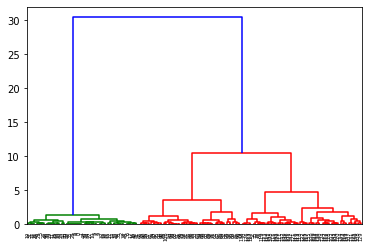

In [26]:
# 덴드로그램
den = dendrogram(linkage_array)

## DBSCAN

* DBSCAN(density-based spatial clustering of applications with noise)
    * 밀도 기반 군집
* 참고: https://subinium.github.io/MLwithPython-3-5/